# STUNTING CLASSIFICATION MODEL


## Install Dependencies

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install tensorflow
%pip install tensorflowjs

## Import Necessary Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import clear_output

## Load Datasets

In [2]:
# Variable
folderName = "StuntingClassificationDataset"
trainFileName = "train.csv"
testFileName = "test.csv"
validationFileName = "val.csv"

# Do not change
train_path = os.path.join(os.getcwd(), 'data', folderName, trainFileName)
train = pd.read_csv(train_path, header=0)

test_path = os.path.join(os.getcwd(), 'data', folderName, testFileName)
test = pd.read_csv(test_path, header=0)

val_path = os.path.join(os.getcwd(), 'data', folderName, validationFileName)
validation = pd.read_csv(val_path, header=0)

print(train.head())
print(test.head())
print(validation.head())

   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm) Status Gizi
0             7     laki-laki               75.2      normal
1            39     perempuan               98.8      normal
2            53     perempuan              103.2      normal
3            38     laki-laki               94.8      normal
4            26     laki-laki               83.3      normal
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm) Status Gizi
0            34     laki-laki               94.4      normal
1            39     laki-laki               91.9      normal
2            21     perempuan               88.1      normal
3             3     perempuan               55.8      normal
4            18     laki-laki               91.1      tinggi
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0            19     perempuan               77.1            normal
1            35     laki-laki               95.9            normal
2            30     laki-laki               99.0            normal


## Convert Categorical Column Into One-Hot Encoding

In [3]:
# Do not change
train['Jenis Kelamin'] = train['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
train['Status Gizi'] = train['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

test['Jenis Kelamin'] = test['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
test['Status Gizi'] = test['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

validation['Jenis Kelamin'] = validation['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
validation['Status Gizi'] = validation['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

print(train.head())
print(test.head())
print(validation.head())

   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0             7              0               75.2            2
1            39              1               98.8            2
2            53              1              103.2            2
3            38              0               94.8            2
4            26              0               83.3            2
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0            34              0               94.4            2
1            39              0               91.9            2
2            21              1               88.1            2
3             3              1               55.8            2
4            18              0               91.1            3
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0            19              1               77.1            2
1            35              0               95.9            2
2            30              0               99.0      

## Split The Dataset Into Features And Label

In [4]:
# Do not change
xtrain = train[['Umur (bulan)', 'Jenis Kelamin','Tinggi Badan (cm)']].values
ytrain = train['Status Gizi'].values

xtest = test[['Umur (bulan)', 'Jenis Kelamin','Tinggi Badan (cm)']].values
ytest = test['Status Gizi'].values

xval = validation[['Umur (bulan)', 'Jenis Kelamin','Tinggi Badan (cm)']].values
yval = validation['Status Gizi'].values

> ## Architechture Options
>
> Available Layer Options (https://www.tensorflow.org/api_docs/python/tf/keras/layers)
>
> Available Optimizer Options (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
>
> Available Losses Options (https://www.tensorflow.org/api_docs/python/tf/keras/losses)
>
> Available Metrics (https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

## Make The Model

In [5]:
# Do not change
optimizer = 'adam'
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ['accuracy']

model = tf.keras.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=8, activation="relu"),
    tf.keras.layers.Dense(units=4, activation="softmax")
])
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428 (1.67 KB)

 Trainable params: 428 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

## Train The Model

In [7]:
# Variable
epochs = 100
batch_size = 16

# Do not change
history = model.fit(
    xtrain,
    ytrain,
    epochs=epochs,
    validation_data=(xval, yval),
    batch_size=batch_size
)

Epoch 1/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 4s 933us/step - accuracy: 0.3398 - loss: 2.9031 - val_accuracy: 0.1036 - val_loss: 1.6846
Epoch 2/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 859us/step - accuracy: 0.5502 - loss: 1.0148 - val_accuracy: 0.5336 - val_loss: 0.8975
Epoch 3/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 847us/step - accuracy: 0.7702 - loss: 0.6251 - val_accuracy: 0.7544 - val_loss: 0.5323
Epoch 4/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 872us/step - accuracy: 0.8554 - loss: 0.4545 - val_accuracy: 0.8186 - val_loss: 0.4142
Epoch 5/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 834us/step - accuracy: 0.8839 - loss: 0.3584 - val_accuracy: 0.8910 - val_loss: 0.2799
Epoch 6/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 833us/step - accuracy: 0.8996 - loss: 0.3019 - val_accuracy: 0.8538 - val_loss: 0.3061
Epoch 7/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 966us/step - accuracy: 0.9080 - loss: 0.2681 - val_accuracy: 0.8473 - val_loss: 0.2876
Epoch 8/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.

## Evaluate The Model

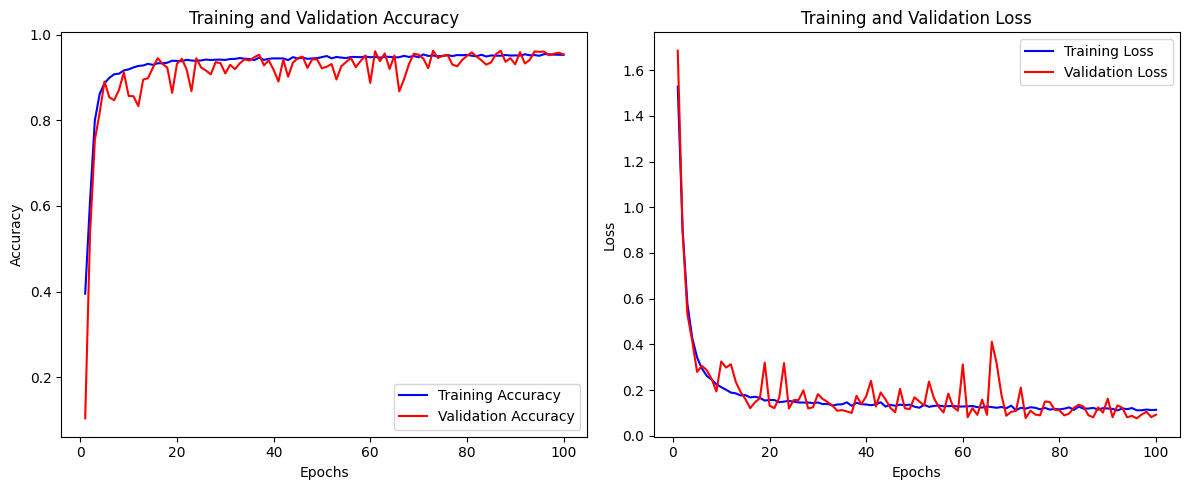

In [8]:
# Do not change

# Extract metrics from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Manually Test Model Accuracy Using Testset

In [ ]:
# Do not change
error = 0

for i in range(xtest.shape[0]):
    print("Iteration:",i)
    pred = xtest[i].reshape(1, -1)
    pred_tensor = tf.convert_to_tensor(pred, dtype=tf.float32)
    prediction = model.predict(pred_tensor, verbose=False)
    index = np.argmax(prediction)
    output = ["severely stunted", "stunted", "normal", "tinggi"][index]
    label = ["severely stunted", "stunted", "normal", "tinggi"][ytest[i]]
    if output != label:
        error += 1
    if i < xtest.shape[0] - 1:
        clear_output(wait=True)

accuracy = ((xtest.shape[0] - error) / xtest.shape[0]) * 100
print(f"Testcase accuracy: {accuracy:.2f}%")

Iteration: 662
Testcase accuracy: 96.23%


## Save The Model

In [ ]:
# Variable
fileName = "StuntingClassificationModel.keras"
folderName = "model"

# Do not change
modelPath = os.path.join(os.getcwd(), folderName, fileName)
os.makedirs(os.path.join(os.getcwd(), folderName), exist_ok=True)
model.save(modelPath)